<a href="https://colab.research.google.com/github/idanshabo/computational_learning/blob/main/PS2_CNN_RNN_2024_5_ID_318632312.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# PS2: Mini-batch SGD, CNN, and RNN

Advanced Learning 2024/5.


Last updated: 2024-12-26


For SUBMISSION:   

Please upload the complete and executed `ipynb` to your git repository. Verify that all of your output can be viewed directly from github, and provide a link to that git file below.

~~~
STUDENT ID: 318632312
~~~

~~~
STUDENT GIT LINK: MISSING
~~~
In Addition, don't forget to add your ID to the files, and upload to moodle the html version:    
  
`PS2_CNN_RNN_2024_ID_[318632312].html`   




---


Imports:

In [ ]:
import numpy as np # You are allowed to use  only numpy.
import time, sys, cProfile
import matplotlib.pyplot as plt

Please import the objects in `src.py` file into the workspace

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
your_drive_path_to_src_file = "/content/drive/MyDrive/"
sys.path.append(your_drive_path_to_src_file)

In [ ]:
from src import *

In [ ]:
from src_1 import *

Note that now all of the network's objects from PS1 are loaded into the workspace.

---

### 0. Loading data

As in PS1, you will evaluate your home-made network on the `mnist` dataset.   
The MNIST dataset is a large dataset of handwritten digits that is commonly used for training various image and vision models.  



In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical
# load MNIST from server
# Using a standard library (keras.datasets) to load the mnist data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

---

## PS2 Part 1: Mini-batch SGD



**Welcome back**.   






Mini-batch Stochastic Gradient Descent (Mini-batch SGD) is an optimization algorithm used to train machine learning models, particularly neural networks. It strikes a balance between two other methods:

    Batch Gradient Descent – Uses the entire dataset to compute gradients and update the model parameters.
        ✅ Accurate gradients
        ❌ Slow and memory-intensive for large datasets

    Stochastic Gradient Descent (SGD) – Uses a single data point to compute gradients for each update.
        ✅ Fast and efficient
        ❌ Noisy updates, which can lead to instability

  
**Mini-batch SGD**.

Mini-batch SGD computes gradients and updates the model parameters using small, randomly selected batches of data (typically 32, 64, or 128 samples).

    ✅ Faster than batch gradient descent
    ✅ Less noisy than pure SGD
    ✅ Efficient use of memory
    ✅ Enables vectorization for faster computation on GPUs

**How it Works**.

    Shuffle the dataset to avoid bias.

    Divide the data into small batches (e.g., 64 samples per batch).

    For each epoch, iterate through the mini-batches:
        Perform forward pass to calculate predictions.
        Compute the loss for the mini-batch.
        Perform backpropagation to compute gradients.
        Update model parameters using the gradients.

    Repeat until the model converges.

**Algorithm**

For each mini-batch $B={x_1,x_2,...,x_m}B={x_1​,x_2​,...,x_m​}$ of size $m$, update the weights $w$ as:    

$$
w=w−η⋅\frac{1}{m}∑_{i=1}^m ∇L(w,x_i)
$$

Where:   
*  $η$ = learning rate.
* $∇L(w,x_i)$ = gradient of the loss for sample $x_i$.   

Advantages

    Efficient and scalable – Works well with large datasets.
    Smooth convergence – Less noisy than SGD but faster than full batch training.
    Parallelization – Batches can be processed in parallel on GPUs.

Disadvantages

    Choosing batch size can affect performance. Small batches lead to noise, large batches consume more memory.
    Convergence may be slower than batch gradient descent for some problems.


### Mini-batch Questions.
**P1Q1**:  

Please answer the following questions providing statistical justifications and mathematical formulas when needed.

P1Q1a: Explain how the mini-batch size impacts convergence, model performance, and computational efficiency.



Convergence - Each update is based on a small batch of training examples, which introduces a high variance in the gradient estimates. The smaller the batch size, the higher the varience will be. This will often result in noisy updates, meaning the convergence to the minimum of the loss function will take longer.

Model performance - While choosing a smaller batch size may increase the time to converge, it can potentially help the model escape local minima, leading to a more global convergence. this happenes because the varience is higher, causing us to sample more potential solutions.

Computational efficiency - the smaller the batch size, each iteration will be faster, and require less computations and memory. On the other hand, because the estimate is noisier, it will take more iterations to converge.

**P1Q1b:**   
Why does mini-batch SGD require a learning rate schedule, and what are the common scheduling strategies?



Mini-batch SGD needs a learning rate schedule because it uses noisy gradient estimates that can lead to instability if the learning rate is fixed. A schedule helps manage this by reducing the learning rate over time, allowing faster convergence while avoiding oscillations or slow progress.

**common learning rate scheduler:**

- Step Decay: Reduce the learning rate by a factor after a fixed number of epochs.
- Exponential Decay: Decrease the learning rate exponentially over time.
- Momentum: Accelerate gradients in the relevant direction, dampening oscillations.
- RMSprop: Adjust the learning rate by dividing by the moving average of squared gradients to stabilize updates.
- Adam: Combines momentum and RMSprop, adapting learning rates based on first and second moments of gradients.

P1Q1c: What role does batch normalization play in mini-batch SGD, and why is it essential for deep neural networks?



There are two main issues that batch normalization attempts to solve:
- internal covariate shift - the situetion where the distribution of each layer’s inputs changes during training as the parameters of previous layers change. This can slow down training because each layer must continuously adapt to these changing distributions.
- exploding/vabishing gradients - espacially in deep neural networks, in each version we multiply the output of the former layer in the output of the next one. in cases where there are many layers, the gradients may get too big or too small

By normalizing the output of each layer, we solve both of these problems. By ensuring that the inputs to each layer are well-scaled, BN reduces the risk of exploding or vanishing gradients, because the mean of each of the matrices we multiply is approximately 1. Also, the batch normalization reduces the change in the output of each layer, improving the learning rate.

P1Q1d: How does mini-batch SGD differ in performance compared to full-batch gradient descent when dealing with non-convex optimization problems?



In non-convex optimization problems, mini-batch SGD outperforms full-batch GD in several ways:

- Escaping Local Minima: Mini-batch SGD, with its noisy updates, helps exploring more effectively the loss surface and escapes local minima and saddle points, which full-batch GD struggles with due to its deterministic nature.
- Faster Convergence: Mini-batch SGD converges faster in practice because it updates weights more frequently and processes smaller subsets of data.
- Computational Efficiency: Mini-batch SGD is computationally cheaper per iteration, making it more scalable for large datasets compared to full-batch GD.

P1Q1e: How does mini-batch SGD perform when training on imbalanced datasets, and what strategies can mitigate its challenges?



Since mini batch SGD samples only a part of the dataset on each iteration, in an impalance dataset, the model may not encounter enough samples from the minority class to properly learn its features, resulting in slower convergence for that class. For the same reason, the model's performance for these small groups in the data can be significantly worse than the model's performance for the main group.

There are several possible solutions:
- Class Weighting: Assign higher weights to the minority class in the loss function, making errors on minority class samples more significant.
- Oversampling Minority Class: Increase the representation of the minority class by oversampling it in the mini-batches. This ensures that the network sees more examples of the minority class during training.
- Synthetic Data Generation: generating synthetic samples for the minority class, improving its representation without simply duplicating existing data.
- Ensuring that mini-batches are sampled in a way that maintains the same class distribution as the full dataset, so each mini-batch has a proportional representation of both classes.

P1Q1f: Explain why larger mini-batch sizes are preferred during inference but not necessarily during training.


During Inference:

- Efficiency: Larger mini-batches are preferred during inference because they maximize hardware utilization (using GPUs). With larger batches, more data can be processed in parallel, leading to faster throughput and reducing the per-sample computational cost.
- No Need for Gradients: Inference does not involve backpropagation or gradient updates, so the system only needs to perform forward passes, which can be efficiently batched.
- Using Larger mini-batch sizes means the outputs of the model are more stable and less noisy.

During Training:
- Generalization: Smaller mini-batches are often preferred during training because they introduce more noise in the gradient estimates. This stochasticity helps the model escape local minima and explore the loss surface more effectively, leading to better generalization.
- Memory/computational Constraints: Larger mini-batches require more memory, and more computations per iteration, potentially leading to slower training for too large batch sizes.
- Longer Convergence: While larger mini-batches can lead to more stable updates, they may slow convergence and lead to poorer generalization, as they reduce the noise that helps the model avoid overfitting.





### Applying mini-batch SGD

Preparing the data:

In [ ]:
# training data : 60000 samples
# reshape and normalize input data
x_train = x_train.reshape(x_train.shape[0], 1, 28*28)
x_train = x_train.astype('float32')
x_train /= 255
# One-hot encoding of the output.
# Currently a number in range [0,9]; Change into a vector of size 10
# e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train = to_categorical(y_train)
# same for test data : 10000 samples
x_test = x_test.reshape(x_test.shape[0], 1, 28*28)
x_test = x_test.astype('float32')
x_test /= 255
y_test = to_categorical(y_test)

P1Q2a:  

Add a new function to the class `MyNetwork` named `fit_mini_batch`. This function should be similar to `fit`, just with a mini-batch SGD implementation. You can also make other code changes to the scripts in `src` if you think they are needed. In addition, add a suitable learning rate scheduler of your choice.   


YOU SHOULD (a) add the missing script to the src code, and (b) make a copy of the function  below for review:

In [ ]:
def fit_mini_batch(self, x_train, y_train, batch_size, epochs, learning_rate):
        samples = len(x_train)
        # Reshape input data to 2D: (samples, features)
        x_train = x_train.reshape(samples, -1)

        print(f"Training on {samples:,} samples with batch size {batch_size}:")

        for i in range(epochs):
            err = 0
            indices = np.random.permutation(samples)

            for j in range(0, samples, batch_size):
                batch_indices = indices[j:min(j+batch_size, samples)]
                x_batch = x_train[batch_indices]  # Will be (batch_size, 784)
                y_batch = y_train[batch_indices]  # Will be (batch_size, 10)

                # Forward propagation
                output = x_batch
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                # Compute error
                batch_err = self.loss(y_batch, output)
                err += batch_err * len(batch_indices)

                # Backward propagation
                grad = self.loss_grad(y_batch, output)
                # Ensure grad is 2D
                if grad.ndim > 2:
                    print(grad.shape)
                    grad = grad.reshape(grad.shape[0], -1)

                for layer in reversed(self.layers):
                    grad = layer.backward_propagation(grad, learning_rate)

            learning_rate *= 0.95
            err /= samples
            print(f"Training epoch {i+1}/{epochs} error={err:f}")


    Test the two networks below to compare the differences between GD and mini-batch SGD:

In [ ]:
#### GD implementaiton ####

# Network Architecture
netGD = MyNetwork()


netGD.add(Affine_Layer(28*28, 128))
netGD.add(ActivationLayer(tanh, tanh_grad))
netGD.add(Affine_Layer(128, 64))
netGD.add(ActivationLayer(tanh, tanh_grad))
netGD.add(Affine_Layer(64, 10))
netGD.add(ActivationLayer(tanh, tanh_grad))

netGD.use_loss(mse, mse_grad)


epoch_num = 10
lr = 0.05
t1 = time.time()
netGD.fit(x_train[:10000], y_train[:10000], epochs=epoch_num, learning_rate=lr)
print(f"Total process time: {round(time.time() - t1,3)}")

Training on 10,000 samples:
Training epoch 1/10   error=0.042104
Training epoch 2/10   error=0.024704
Training epoch 3/10   error=0.019115
Training epoch 4/10   error=0.015964
Training epoch 5/10   error=0.013826
Training epoch 6/10   error=0.012256
Training epoch 7/10   error=0.011029
Training epoch 8/10   error=0.010023
Training epoch 9/10   error=0.009175
Training epoch 10/10   error=0.008451
Total process time: 92.819


In [ ]:
output_GD = netGD.predict(x_test ,y_test )


Test set: Avg. loss: 0.0117, Accuracy: 9355/10000 (94%)



In [ ]:
#### mini-batch SGD implementaiton ####

# Network Architecture
netMiniGD = MyNetwork()


netMiniGD.add(Affine_Layer(28*28, 128))
netMiniGD.add(ActivationLayer(tanh, tanh_grad))
netMiniGD.add(Affine_Layer(128, 64))
netMiniGD.add(ActivationLayer(tanh, tanh_grad))
netMiniGD.add(Affine_Layer(64, 10))
netMiniGD.add(ActivationLayer(tanh, tanh_grad))

netMiniGD.use_loss(mse, mse_grad)


epoch_num = 10
initial_lr = 0.4 # added a simple learning rate scheduler inside the fit_mini_batch function in src
# for that reason - started with a high learning rate that decreases over time
t2 = time.time()

netMiniGD.fit_mini_batch(x_train[:10000], y_train[:10000], batch_size=128, epochs=epoch_num, learning_rate=initial_lr)
print(f"Total process time: {round(time.time() - t2,3)}")

Training on 10,000 samples with batch size 128:
Training epoch 1/10 error=0.076927
Training epoch 2/10 error=0.050676
Training epoch 3/10 error=0.045253
Training epoch 4/10 error=0.041772
Training epoch 5/10 error=0.039286
Training epoch 6/10 error=0.037128
Training epoch 7/10 error=0.035351
Training epoch 8/10 error=0.034015
Training epoch 9/10 error=0.032689
Training epoch 10/10 error=0.031668
Total process time: 10.605


In [ ]:
outputMiniGSD = netMiniGD.predict(x_test ,y_test )


Test set: Avg. loss: 0.0343, Accuracy: 8920/10000 (89%)



P1Q2b:   
Please answer the following:
* Which implementation was faster?
* with lower training error?
* with better test accuracy?    

and explain how these results fit your answers in Q1A.

- Speed: Mini-batch being faster aligns with expectations because:

  - It updates weights more frequently (after each batch rather than after seeing all data)
  - Processes smaller chunks of data at once, requiring less memory
  - Can leverage modern hardware's parallel processing capabilities better (didn't use these abilities in this example)


- Training Error: Full batch having lower training error makes sense because:

  - It uses the true gradient of the entire dataset
  - More stable updates since it considers all examples at once
  - Mini-batch introduces noise in gradient estimation, leading to less precise optimization


- Test Accuracy: Full batch performing better (94% vs 89%) is interesting because:

  - While mini-batch's noisier updates can sometimes help escape local minima and improve generalization, In this case, the stability of full batch gradient descent led to better generalization. This solution suggests the optimization landscape for this problem might be relatively well-behaved (no local minimas)



regarding the way these results fit my answers in Q1A:

- Convergence and Training Error:

  - Theory (from Q1A): "Each update is based on a small batch of training examples, which introduces a high variance in the gradient estimates... This will often result in noisy updates, meaning the convergence to the minimum of the loss function will take longer."
  - Results Confirm This: The mini-batch training error (0.03) was notably higher than full batch (0.008), showing exactly this effect of noisier updates leading to less precise convergence.


- Model Performance:

  - Theory: "While choosing a smaller batch size may increase the time to converge, it can potentially help the model escape local minima, leading to a more global convergence."
  - Results Actually Show the Opposite: Full batch achieved better test accuracy (94% vs 89%). This suggests that in this specific case the optimization landscape might be well-behaved enough that the noise from mini-batch updates wasn't beneficial. The theoretical advantage of escaping local minima wasn't necessary for this particular problem

- Computational Efficiency:

  - Theory: "The smaller the batch size, each iteration will be faster, and require less computations and memory. On the other hand, because the estimate is noisier, it will take more iterations to converge."
  - Results Strongly Confirm This: Mini-batch was significantly faster (10.6s vs 92.8s) while achieving reasonable accuracy, demonstrating the predicted efficiency advantage despite needing more iterations to achieve convergence.

## PS2 Part 2: CNN



A Convolutional Neural Network (CNN) is a type of a deep neural network that can perform well at image recognition and analysis tasks.


> In this problem set we will add CNN compatibility to our numpy-based neural network from PS 1.

The main components needed to implement a CNN architecture:  

**Convolution layer:** In the convolutional layers, filters are applied to the image to identify patterns and features. Imagine a sliding window that moves across the image, detecting edges, shapes, and other building blocks.  

**Pooling layer:** Pooling layers downsample the data, reducing its complexity and computational cost. This helps prevent overfitting, where the model memorizes training data instead of learning generalizable patterns.  

**Reshape layer:**
Reshaping the output of the convolution and pooling layers into the fully connected layer.   


A USEFUL HINT:

*Keeping account of the input and output shapes along the CNN network is crucial for the model to work as intended*



Useful resource:  
* [CS231](https://cs231n.github.io/convolutional-networks/).
* [Convolutional Neural Network From Scratch](https://www.kaggle.com/code/lusfernandotorres/convolutional-neural-network-from-scratch).
* [CNN with PyTorch](https://www.kaggle.com/code/sdelecourt/cnn-with-pytorch-for-mnist)

#### Data transformations





(Here I added a reshape that I originally intended for you to apply at model time).

In [16]:
from keras.datasets import mnist
from keras.utils import to_categorical
# load MNIST from server
# Using a standard library (keras.datasets) to load the mnist data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [17]:
# training data : 60000 samples
# reshape and normalize input data
x_train = x_train.astype('float32')
x_train /= 255
x_train = x_train.reshape(x_train.shape[0],1,
                          x_train.shape[1],x_train.shape[2])
# One-hot encoding of the output.
# Currently a number in range [0,9]; Change into a vector of size 10
# e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train = to_categorical(y_train)
y_train = y_train.reshape(y_train.shape[0],1,
                          y_train.shape[1])

# same for test data : 10000 samples
x_test = x_test.astype('float32')
x_test /= 255
x_test = x_test.reshape(x_test.shape[0],1,
                          x_test.shape[1],x_test.shape[2])
y_test = to_categorical(y_test)
y_test = y_test.reshape(y_test.shape[0],1,
                          y_test.shape[1])

In [18]:
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)


x_train shape (60000, 1, 28, 28)
x_test shape (10000, 1, 28, 28)
y_train shape (60000, 1, 10)
y_test shape (10000, 1, 10)


Unlike the multilayer perceptron (MLP) architecture, the input to the convolution net is not flattened. In our case, the size of a single `MNIST` datapoint is (1,28,28). The first dimension is the number of channels (e.g. RGB  for color images). During training the inputs and outputs often  change shape as they pass through the convolution, pooling, and the other layers of the network.

---

### A. Convolution Layer

Here you are asked to implement a basic Convolution layer with the following components:



1.   Layer initialization - initialize the layer's filters using Normalized Xavier/Hu weights
2.   A generator function that yields all the available sliding windows in the input image.
3.   Forward propogation for the convolution layer
4.   Backward propogation for the convolution layer

[CS231](https://cs231n.github.io/convolutional-networks/#conv) provides a great overview both mathematically and visually,   
and [CS230](https://cs230.stanford.edu/section/4/) provides a good overview about Xavier initialization.




P2Q1a:  (10pts).   
Please complete the missing code (`## SOLUTION REQUIRED!!`) so that the class works properly.    
You can deviate slightly from the recommended structure below, but please remain true to the class structure and compatibility with the rest of the network classes and functions. The idea here is to write YOUR OWN version of CNN, so please try not to google the answers.





In [ ]:
### MISSING: SOLUTION REQUIRED IN THIS CODE BLOCK

class Convolution:
    # convolution layer using num_filters x num_filters filters.
    # size is the length/width of the filter window with shape (size x size)
    # In this simple implementation, there is no padding.

    def __init__(self, num_filters=3, size=3, activation=None):
        self.stride = 1 # for simplicity, we keep the stride=1.
        self.size = size
        self.activation = activation
        self.last_input = None


        # Initialize the Convolution layer filters
        ## SOLUTION REQUIRED!!
        self.filters = np.random.randn(num_filters, size, size) * np.sqrt(2 / (size * size + num_filters))
        #self.filters = np.random.randn(num_filters, size, size) * np.sqrt(2 / (self.last_input.shape[1] * self.last_input.shape[2] + self.output_size * self.output_size * num_filters))


    def patch_generator(self, image):
        # This generator (using yield) returns all the  possible patches of  the input image
        # of shape  (h,w)  for each channel c, together with the relevant y,x coordinates of the patch.
        # input_data/image must be shaped as (c,y,x), where c is the channel/filter
        ch,h,w = image.shape

        for y in range(0,h-self.size+1):
            for x in range(0,w-self.size+1,self.stride):
                ## SOLUTION REQUIRED!!
                patch = image[:, y:y + self.size, x:x + self.size]
                yield patch, y, x

    def forward_propagation(self, image):
        # Calculate the convolution forward pass using the filters together with a
        # user specified activation function.

        # If this is the first convolution layer, the input image is size (h,w) and must be expanded to (c,h,w).
        if len(image.shape)==2:
            image = np.expand_dims(image, axis=0)
        # keep track of last input for later backward propagation
        self.last_input = image
        # Initializing the output array:
        ## SOLUTION REQUIRED!!
        input_dimension = self.last_input.shape[1]
        output_dimension = (input_dimension - self.size) + 1

        # compute output dimensions after the convolution layer
        output = np.zeros((self.filters.shape[0], output_dimension, output_dimension))

        # forward pass on each filter
        for f in range(self.filters.shape[0]):
            for patch, y, x in self.patch_generator(image):
                ## SOLUTION REQUIRED!!
                output[f,y, x] =  np.sum(patch * self.filters[f])

        # Applying activation function (this is a small cheat/simplification
        #  because the activation should be a separate layer in itself.  )
        if self.activation is not None:
            output = self.activation.forward_propagation(output)
        return output

    def backward_propagation(self, grad_out, learning_rate):
        # Calculate the SGD in-gradients of the filters and the layer.
        # Update only the filters gradients.

        # back propagate through activation (again, a bit of a cheat)
        if self.activation is not None:
            grad_out = self.activation.backward_propagation(grad_out,learning_rate)

        ## SOLUTION REQUIRED!!
        grad_in = np.zeros(self.last_input.shape)
        grad_filter = np.zeros(self.filters.shape)
        # grad_in = np.zeros(MISSING)  loss gradient of the input
        # grad_filter = np.zeros(MISSING) # loss gradient of filter


        for f in range(self.filters.shape[0]):
            for patch, y, x in self.patch_generator(self.last_input):
                ## SOLUTION REQUIRED!!
                #grad_filter[f] += patch * grad_out[f, y, x]
                grad_filter[f] += np.sum(patch * grad_out[f, y, x], axis=0)
                grad_in[:, y:y + self.size, x:x + self.size] += self.filters[f] * grad_out[f, y, x]
                # grad_filter[f] +=.  # calculate the gradient of the filter
                # grad_in[:, y:y + self.size, x:x + self.size] += # calculate the gradient of input


        ## SOLUTION REQUIRED!!
        self.filters -=  learning_rate * grad_filter

        return grad_in    # return the loss gradient for this layer's inputs


### B. Max-pooling Layer

As with the convolution layer, here you are asked to implement a basic max-pooling layer with the following components:


1.   A generator function that yields all the available sliding windows in the input image. You can reuse the generator from (1).
2.   Forward propogation for the max-pooling layer
3.   Backward propogation for the max-pooling layer

The pooling layer is responsible for reducing the dimensionality of the input. As with the convolution layer, the pooling layer slides a filter across the entire image input to calculate the output. Note that this layer does not have any weights.  As the filter slides through the input image, it selects the pixel with the maximum value to populate the output array.

P2Q1b: (10pts).       

Please complete the missing code (`## SOLUTION REQUIRED!!`) so that the class works properly.  





In [ ]:
class MaxPool:
    def __init__(self,  size=2):
        # max pooling layer

        self.last_input = None
        self.stride = 1
        self.size = size

    def patch_generator(self, image):
        # returns a generator (using yield) of all  possible patches of size size x size
        # input_data/image must be shaped as (c,y,x)
        ch,h,w = image.shape

        for c in range(ch):
          for y in range(0,h-self.size+1):
              for x in range(0,w-self.size+1,self.stride):
                  patch = image[c, y:y + self.size, x:x + self.size]
                  yield patch, c, y, x

    def forward_propagation(self, image):
        # keep track of last input for later backward propagation
        self.last_input = image

        # compute output dimensions after the max pooling
        num_channels, h_prev, w_prev = image.shape
        ## SOLUTION REQUIRED!!
        h_new = (h_prev - self.size) + 1
        w_new = (w_prev - self.size) + 1
        # hold the values of the max pooling
        output = np.zeros((num_channels, h_new, w_new))

        # Calculate the max pool on all the image patches using the generator:
        # CODE MISSING
        for patch, c, y, x in self.patch_generator(image):
            output[c ,y, x] = np.max(patch)
        return output

    def backward_propagation(self, grad_out, learning_rate):
        # Calculate the gradients of the last input image
        num_channels, orig_dim, *_ = self.last_input.shape
        grad_in = np.zeros(self.last_input.shape)

        # Using the generator, go over all the channels and calcualte the max-pooling input gradients
        # for c in range(num_channels):
        for patch, c, y, x in self.patch_generator(self.last_input):
            (x, y) = np.unravel_index(np.nanargmax(patch), patch.shape)
            ## SOLUTION REQUIRED!!
            grad_in[c, y + (x, y)[0], x + (x, y)[1]] += grad_out[c, y, x]

            # grad_in[MISSING] +=


        return grad_in

### C. Reshape Layer

A reshape layer in a neural network is a transformation layer that doesn't perform any computations itself (no weights).   
Its purpose is to simply change the dimensionality (shape) of the data flowing through the network.

Here's how reshape layers work:

You define a target shape for the output of the reshape layer.   
This target shape specifies the number of elements along each dimension (width, height, channels, etc.) for the new data format.

P2Q1c:  (5pts).   
Please complete the missing code (`## SOLUTION REQUIRED!!`) so that the class works properly.  





In [ ]:
class Reshape:
    def __init__(self,input_shape,output_shape):
        self.input_shape=input_shape
        self.output_shape=output_shape
    def forward_propagation(self,input_data):
        ## SOLUTION REQUIRED!!
        # return MISSING (use np.reshape)
        return(np.reshape(input_data, self.output_shape))

    def backward_propagation(self,output_gradient,learning_rate):
        # you can ignore the learning_rate
        ## SOLUTION REQUIRED!!
        # return MISSING (use np.reshape)
        return(np.reshape(output_gradient, self.input_shape))

### Testing Your Neural Network

### Defining our main neural network architecture

Define your CNN network's architecture:

* A convolution layer with some filters `(f)` and a window size of `(w x w)`, with a `tanh` activation function.
* A max pooling layer of a window size of `(p x p)`.  
* First affine layer that takes your input and outputs 128 nodes
* `tanh` activation layer following the first affine layer
* Second affine layer that takes the first layer's input and outputs 64 nodes
* `tanh` activation layer following the second affine layer
* Third affine layer that takes your second layer's input and outputs nodes in the size of the Y labels.
* `tanh` activation layer following the last affine layer


You can compute the shapes of the convolution and max-pool layers' outputs  as a function of the input shape, the convolution sliding window size, and the number of filters for applied. ( the stride and padding are usually also used to calculate the output shapes, but in this simple implementation we set the stride to 1 with zero padding.).

P2Q2a: (5pts).        
Calculate the input and output shapes of each layer in the network below, up until the first affine layer (including).  (mathematically) explain your answer.  

In [ ]:
# in a convolution operation or in max pooling operation, the output size (height and width) of the feature map is determined
# by the input size (height and width), filter size (w), and stride.
# this is calculated using the following formula:
#
# output_height = (initial_image_height - w) / stride + 1
# outputwidth = (initial_image_width - w) / stride + 1
#
# explanation of the formula:
# 1. input_size - filter_size:
#    - this gives the range of valid positions where the filter can be applied.
#    - we subtract the filter size because the filter cannot extend beyond the boundary of the input image.
#
# 2. (input_size - filter_size) / stride:
#    - the stride defines how many pixels the filter moves with each step.
#    - dividing the range (input_size - filter_size) by the stride gives us the number of valid steps the filter can take
#      across the input. if the stride is 1, the filter moves one pixel at a time.
#
# 3. +1:
#    - we add 1 because the filter starts at the very first position and moves until it can no longer fully fit on the image.
#      this accounts for the initial position where the filter is applied.

convolution_layer_input_size = (num_channels, initial_image_height, initial_image_width)
convolution_layer_output_size = (num_channels, (initial_image_height - w + 1), (initial_image_width - w + 1), f)
max_pooling_layer_input_size = (num_channels, (initial_image_height - w + 1), (initial_image_width - w + 1), f)
max_pooling_layer_output_size = (num_channels, (initial_image_height - w + 1 - p + 1), (initial_image_width - w + 1 - p + 1), f)

# before inserting the output of max_pooling_layer into the affine layer we will flatten it into a vector
# the size of the vector is (1, num_channels * (initial_image_height - w + 1 - p + 1) * (initial_image_width - w + 1 - p + 1) * f)
# every affine layer gets input which is a vector, and return a vector, depending on the shape of the layer's vec
# activation functions do not change the shape of the input data
first_affine_layer_input_size =  (1, num_channels * (initial_image_height - w + 1 - p + 1) * (initial_image_width - w + 1 - p + 1) * f)
first_affine_layer_output_size = (1, 128)
first_tanh_layer_input_size = (1, 128)
first_tanh_layer_output_size = (1, 128)
second_affine_layer_input_size =(1, 128)
second_affine_layer_output_size = (1, 64)
second_tanh_layer_input_size = (1, 64)
second_tanh_layer_output_size = (1, 64)
third_affine_layer_input_size = (1, 64)
third_affine_layer_output_size = (1, num_classes)
third_tanh_layer_input_size = (1, num_classes)
third_tanh_layer_output_size = (1, num_classes)

P2Q2b:  (5pts).   

Please complete the missing code (`## SOLUTION REQUIRED!!`) so that the network architecture works properly.  





In [ ]:
# Network Architecture
CNNnet = MyNetwork()
num_classes = 10
# Reshape sizes:
## SOLUTION REQUIRED!!
c = 12
x_new = 24
y_new = 24


# Adding convolution and max-pool layers:
CNNnet.add(Convolution(num_filters=12, size=3,
                    activation=ActivationLayer(relu, relu_grad))) #
CNNnet.add(MaxPool(size=3))

# Reshaping for first affine layer:
CNNnet.add(Reshape((c,y_new,x_new),(1,c*y_new*x_new)))

# Adding affine layers and activation functions:
CNNnet.add(Affine_Layer(c*y_new*x_new, 128))
CNNnet.add(ActivationLayer(tanh, tanh_grad))
CNNnet.add(Affine_Layer(128, 64))
CNNnet.add(ActivationLayer(tanh, tanh_grad))
CNNnet.add(Affine_Layer(64, num_classes))
CNNnet.add(ActivationLayer(tanh, tanh_grad))

# CNNnet.add(ActivationLayer(relu, relu_grad))
# CNNnet.add(ActivationLayer(tanh, tanh_grad))
# CNNnet.add(ActivationLayer(sigmoid, sigmoid_grad))

### Training!

There is no need to train the model on the entire dataset (you'l see why now...). Try to prove that your network works as expected by showing that your error decreases dramatically even on a small sample (say, around 1k).

In [ ]:

# While developing, it is recommended to train your model on a subset of the data... / or low epochs.
# Training will be pretty slow if we update at each iteration on 60000 samples...]
CNNnet.use_loss(mse, mse_grad)
epoch_num = 20 #20
lr = 0.1
t1 = time.time()
CNNnet.fit(x_train[:1000], y_train[:1000], epochs=epoch_num,
           learning_rate=lr)
print(f"Total process time: {round(time.time() - t1,3)}")


Training on 1,000 samples:
Training epoch 1/20   error=0.081064
Training epoch 2/20   error=0.044193
Training epoch 3/20   error=0.034016
Training epoch 4/20   error=0.027210
Training epoch 5/20   error=0.022339
Training epoch 6/20   error=0.018287
Training epoch 7/20   error=0.015543
Training epoch 8/20   error=0.013020
Training epoch 9/20   error=0.010951
Training epoch 10/20   error=0.009389
Training epoch 11/20   error=0.008133
Training epoch 12/20   error=0.007119
Training epoch 13/20   error=0.006277
Training epoch 14/20   error=0.005564
Training epoch 15/20   error=0.004948
Training epoch 16/20   error=0.004495
Training epoch 17/20   error=0.004137
Training epoch 18/20   error=0.003773
Training epoch 19/20   error=0.003439
Training epoch 20/20   error=0.003170
Total process time: 11213.177


Hurray - if you got to this point, your CNN model works, but is EXTREMELY slow.   
Let's check why using a cProfiler:

In [ ]:
CNNnet.prof(x_train[:100], y_train[:100],epochs=4,learning_rate=lr)

Training on 100 samples:
Training epoch 1/4   error=0.003205
Training epoch 2/4   error=0.002332
Training epoch 3/4   error=0.001818
Training epoch 4/4   error=0.001586
         151495781 function calls in 305.882 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  6499200    6.778    0.000    6.778    0.000 <ipython-input-28-2b157be04e53>:21(patch_generator)
      400   14.511    0.036   40.250    0.101 <ipython-input-28-2b157be04e53>:33(forward_propagation)
      400   52.213    0.131   79.494    0.199 <ipython-input-28-2b157be04e53>:62(backward_propagation)
  5530400    6.329    0.000    6.329    0.000 <ipython-input-29-33f7cdc2d157>:11(patch_generator)
      400    4.087    0.010   24.179    0.060 <ipython-input-29-33f7cdc2d157>:22(forward_propagation)
      400   28.686    0.072  158.480    0.396 <ipython-input-29-33f7cdc2d157>:40(backward_propagation)
      400    0.002    0.000    0.010    0.000 <ipython-input-30-3ce38

P2Q2c:  (5pts).     
Why do you think our CNN implementation is slow? Your answer should relate to the  approximate `O(n)` time/computational complexity .

Our CNN implementation is slow primarily because we use nested Python loops to process each pixel position individually during both forward and backward passes. For input size Height×Width, filter size w×w, C number of input channels and F filters, this gives us O(F × Height × Width × w × w x C) complexity.

If we would have used modern implementations, they would use vectorized operations and matrix multiplication tricks to achieve better effective complexity.

### Evaluation

Exciting! Now is the time to test your model.     


    May the gradients be always in your favor.

P2Q2b (cont'd):

**Try to limit the number of epochs and the size of the trained data, while still achieving an accuracy score of >85%.**

In [ ]:
output = CNNnet.predict(x_test[:500] ,y_test[:500] )


Test set: Avg. loss: 0.0302, Accuracy: 436/500 (87%)



### Benchmarking against PyTorch

How well your model performs against a similar-architecture PyTorch model?   
It is time to find out:

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset

**Prepare the data as tensors using PyTorch DataLoader:**

In [33]:
t_train =  TensorDataset(torch.Tensor(x_train),torch.Tensor(y_train))
t_test =  TensorDataset(torch.Tensor(x_test),torch.Tensor(y_test))
train_loader = torch.utils.data.DataLoader(dataset=t_train, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=t_test, batch_size=64, shuffle=False)

Define a `PyTorchCNN` class with an identical architecture you used in your home-made network.  
Hint: use `x = x.view()` to handle reshapes.

P2Q3a: (5pts).   

In [37]:
class PyTorchCNN(nn.Module):
    def __init__(self):
        super(PyTorchCNN, self).__init__()
        input_size = (28,28)
        num_classes = 10

        self.conv = nn.Conv2d(in_channels=1,
                            out_channels=12,
                            kernel_size=3,
                            stride=1)

        # ReLU activation
        self.relu = nn.ReLU()

        # MaxPool layer with 3x3 window
        self.pool = nn.MaxPool2d(kernel_size=3, stride=1)

        # Calculate size after conv and pool
        # After conv: (28-3+1) = 26
        # After pool: (26-3+1) = 24
        # Features: 12 * 24 * 24
        self.conv_output_size = 12 * 24 * 24

        # Fully connected layers matching our architecture
        self.fc1 = nn.Linear(self.conv_output_size, 128)
        self.tanh1 = nn.Tanh()
        self.fc2 = nn.Linear(128, 64)
        self.tanh2 = nn.Tanh()
        self.fc3 = nn.Linear(64, num_classes)
        self.tanh3 = nn.Tanh()


    def forward(self, x):
        x = x.view(-1, 1, 28,28)
        # Conv + ReLU + Pool
        x = self.pool(self.relu(self.conv(x)))

        # Flatten for fully connected layers
        x = x.view(x.size(0), -1)

        # Fully connected layers with tanh activation
        x = self.tanh1(self.fc1(x))
        x = self.tanh2(self.fc2(x))
        x = self.tanh3(self.fc3(x))

        return x

In [39]:
# Train the model
num_epochs = 10
pt_learning_rate = 0.01
pt_network = PyTorchCNN()
optimizer = torch.optim.Adam(pt_network.parameters(), lr=pt_learning_rate)
criterion = nn.MSELoss()

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        # labels = labels.view(64,1,10)
        outputs = pt_network(images)
        labels = labels.squeeze(dim=1)
        loss = criterion(outputs, labels)
        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # A handy printout:
        if (i + 1) % 500 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

Epoch [1/10], Step [500/938], Loss: 0.0152
Epoch [2/10], Step [500/938], Loss: 0.0032
Epoch [3/10], Step [500/938], Loss: 0.0051
Epoch [4/10], Step [500/938], Loss: 0.0044
Epoch [5/10], Step [500/938], Loss: 0.0043
Epoch [6/10], Step [500/938], Loss: 0.0060
Epoch [7/10], Step [500/938], Loss: 0.0040
Epoch [8/10], Step [500/938], Loss: 0.0153
Epoch [9/10], Step [500/938], Loss: 0.0108
Epoch [10/10], Step [500/938], Loss: 0.0113


Evaluation:

In [41]:
pt_network.eval()
test_losses = []
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        target = target.squeeze(dim=1)
        output = pt_network(data)
        test_loss += criterion(output, target,)
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.max(1,keepdim=True)[1]).sum()

test_loss /= len(test_loader.dataset)
test_losses.append(test_loss)
print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
  test_loss, correct, len(test_loader.dataset),
  100. * correct / len(test_loader.dataset)))


Test set: Avg. loss: 0.0001, Accuracy: 9703/10000 (97%)



P2Q3b (5pts).   

Time for some questions:
1. Which one of the models performed better? Why?
2. Which one of the models performed faster? Why?  
3. What would you change in your network's architecture?   
4. What would you change in your model's solution algorithm?

Write your solutions here:

1. The PyTorch model performed better because:
  - It uses more optimized implementations of operations
  - It has better numerical stability due to PyTorch's built-in handling of gradients
  - It benefits from PyTorch's battle-tested implementations that avoid common numerical issues


2. The PyTorch model was significantly faster because:
  - It uses vectorized operations instead of our nested Python loops (optimise the operation using C++)
  - Our implementation has O(F × Height × Width × w × w x C)  complexity with high overhead from Python loops


3. To improve the network architecture:
  - Add batch normalization layers to improve training stability
  - Use padding in convolutions to preserve spatial dimensions
  - Add dropout layers to prevent overfitting
  - Use more conv layers before pooling to learn better features
  - Consider using larger filter numbers (32, 64 instead of 12)


4. To improve the model's solution algorithm:
  - Vectorize the convolution operations
  - Implement mini-batch processing
  - Add momentum to the gradient descent
  - Use a learning rate scheduler (like in the pytorch version)

---

## PS2 Part 3: RNN

In this part we are going to implement a simple time-series prediction using RNN on a noisy simulated funcitonal data.

There are two main goals in time series prediction:

**Understanding the data:** This involves identifying the patterns and trends that exist in the data over time.    
By understanding these patterns, we can gain insights into the underlying processes that generate the data.    
For instance, time series analysis might reveal seasonal trends in sales data or cyclical patterns in stock prices.

**Forecasting future values:** This is the more commonly recognized goal of time series prediction.   
By leveraging the patterns and trends identified in the data, we can make predictions about what the data will look like in the future.   
This can be helpful for tasks like planning inventory levels, managing financial risk, or predicting weather patterns.

**Recurrent Neural Networks (RNNs)** are a powerful tool for time series prediction because they can handle the sequential nature of time series data.   Unlike traditional neural networks, RNNs have internal memory that allows them to consider past information when making predictions. This is particularly useful for time series data where the value at any given point in time is often influenced by past values.

*Here's a breakdown of how RNNs are used for time series prediction:*

The Model Architecture:

* A typical RNN model for time series prediction consists of an input layer, one or more hidden layers with special RNN cells (like LSTM or GRU), and an output layer.
The hidden layers process the data sequences.   
* Each cell in the hidden layer receives the current input and the output from the previous cell in the sequence. This allows the network to consider past information.

**The Training Process:**

* The RNN is trained on historical time series data. The model is presented with sequences of data points, and it learns to predict the next value in the sequence.  
* During training, the RNN uses backpropagation through time (BPTT), a variant of the standard backpropagation algorithm, to adjust its internal parameters and improve its prediction accuracy.

### Simulating data



> In this example, each training step ($t$) consists of a sequence of target data of length $k$ ($t-k:t$), and a training sequence of the same length, but with a lag ($t-k-l:t-l$). Our RNN should predict the target sequence using the lagged training sequence.



We simulate cyclical data using a function of `sin` and `cos`:

*   As is, the output of our function is cyclical (recurring) in `t`.
*   We also add a `sin` shift (`np.sin(s)`) that adds a small drift between steps.
* Our target is defined as: $y(t,s) = sin(sin(s)*2*\pi*t+\pi/6)+cos(2*\sqrt(3)*t) $
*   Our training data (without lag) is defined as:



$$y_{\alpha}(t,s) = sin(sin(s)*2*\pi*t+\pi/6)+cos(2*\sqrt(3)*t) + N(0,1)*\alpha$$

Image that we only observe the noisy training data and the target, without having any insight into the generating function.

P3Q1 (10pts)  
Fill out the missing code according to the function definition above

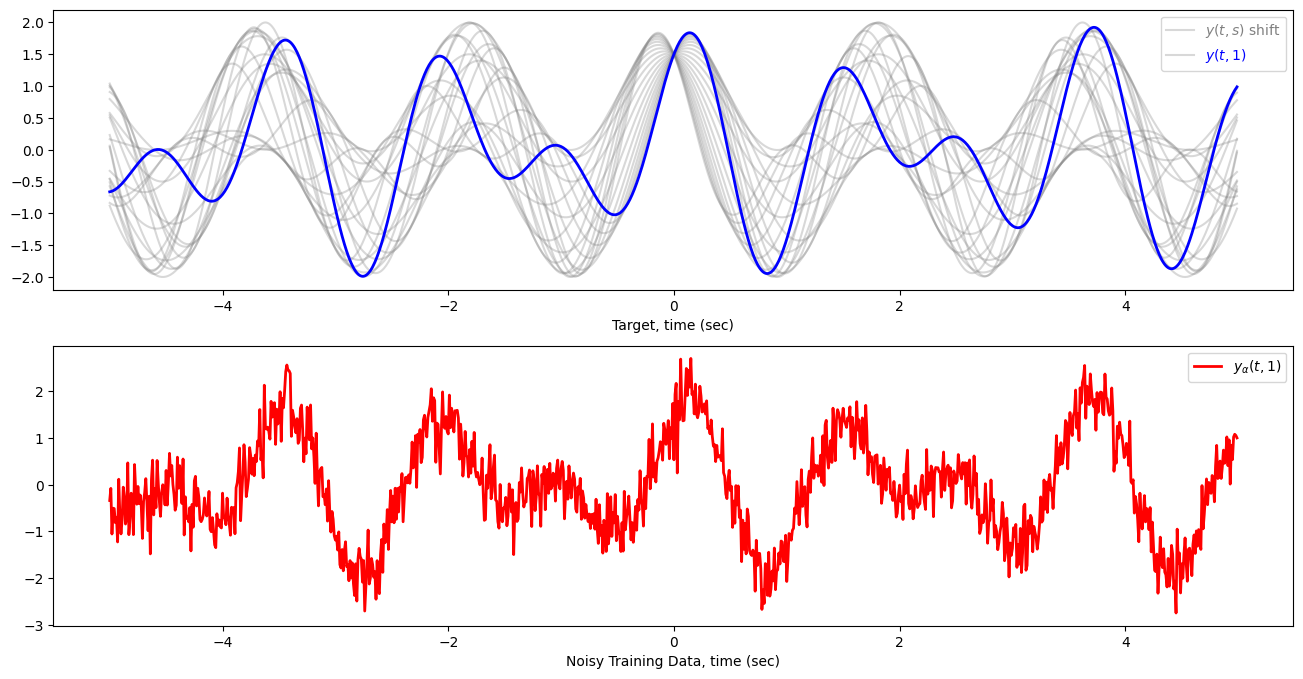

In [ ]:
## Plotting simulated functional data

t_line = np.arange(-5., 5., 1/100.) # line space
alpha = 0.4
## Creating a function to produce cyclical y data.
def y_func(s, add_noise = False):
    t_line = np.arange(-5., 5., 1/100.)
    alpha = 0.4
    noise = np.random.normal(0, 1, size=t_line.shape) * alpha
    if add_noise:
        y = np.sin(np.sin(s) * 2 * np.pi * t_line + np.pi / 6) + np.cos(2 * np.sqrt(3) * t_line) + noise
    else:
        y = np.sin(np.sin(s) * 2 * np.pi * t_line + np.pi / 6) + np.cos(2 * np.sqrt(3) * t_line)
    return y

y = y_func(1)
## Adding noise
y_noisy = y_func(1, add_noise = True)


## Plotting
fig, ax = plt.subplots(2,1, figsize=(16,8))
fval = np.arange(-1,1,0.1)

for i in fval:
    ax[0].plot(t_line, y_func(i), color='gray', alpha=.3,label="$sin(f)$ shift")

ax[0].plot(t_line, y, lw = 2,label = "fixed $f$",color="b")
ax[0].set_xlabel('Target, time (sec)')
ax[1].plot(t_line, y_noisy, lw = 2,c="r")
ax[1].set_xlabel('Noisy Training Data, time (sec)')
ax[0].legend(["$y(t,s)$ shift","$y(t,1)$"],labelcolor=["gray","b"])
ax[1].legend(["$y_{\\alpha}(t,1)$"])


In the figure above we can see the true output of the generating function, given a specific value of $s$ (blue), and various drifts according to different values of $s$ (gray).  In the bottom plot you can see the noisy data (training),  matching the blue graph in the top plot.

### Creating PyTorch RNN model

Here we create a basic PyTorch RNN class (inherits from `nn.Module`).  

* *input_size* – The number of expected features (dimensions) in the input t

* *hidden_size* – The number of features in the hidden state h

* *num_layers* – Number of recurrent layers. E.g., setting num_layers=2 would mean stacking two RNNs together to form a stacked RNN, with the second RNN taking in outputs of the first RNN and computing the final results.    

* batch_first – If True, then the input and output tensors are provided as (batch, seq, feature) instead of (seq, batch, feature). Note that this does not apply to hidden or cell states.




For more information, please check the
[PyTorch nn.RNN](https://pytorch.org/docs/stable/generated/torch.nn.RNN.html#torch.nn.RNN) documentation.


In [ ]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(RNN, self).__init__()

        self.hidden_dim=hidden_dim

        # define an RNN with specified parameters
        # batch_first means that the first dim of the input and output will be the batch_size
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)

        # Adding a fully-connected layer
        self.fc = nn.Linear(hidden_dim, output_size)

    def forward(self, x, hidden):
        # x (batch_size, seq_length, input_size)
        # hidden (n_layers, batch_size, hidden_dim)
        # r_out (batch_size, time_step, hidden_size)
        batch_size = x.size(0)

        # get RNN outputs
        r_out, hidden = self.rnn(x, hidden)
        r_out = r_out.view(-1, self.hidden_dim)

        # get final output
        output = self.fc(r_out)

        return output, hidden


In [ ]:
# RNN Hyperparameters
input_size=1 # our data is 1-dim
output_size=1
hidden_dim=16
n_layers=2

# instantiate an RNN model
rnn = RNN(input_size, output_size, hidden_dim, n_layers)
print(rnn)

RNN(
  (rnn): RNN(1, 16, num_layers=2, batch_first=True)
  (fc): Linear(in_features=16, out_features=1, bias=True)
)


### RNN Training

Now we need to define a training function that takes the following hyper-parameters:  

* rnn : the RNN model object
* n_steps = on how many steps ($t$) to train the model (equivalent to "epochs").
* lag = the steps/datapoints lag between the training and target data.
* alpha = how much noise to add to the training data
* seq_length = how many datapoints  (time-series steps) to consider in each "epoch": $(t-k:t)$
* stride = the window size of the function (of which the seq_length will be divided).
* print_every = how often (in steps) to print a plot of the prediction against the target.

At each step, we have a lagged value of x, noisy lagged value of x (training), and a value of y (target not lagged).

P3Q2:  (5pts)

Fill out the missing code according to the function definition above

In [ ]:
# As above, creating a simulated data generator from the function
# this time, the function should depend on the step as well

def y_func(s, t_line, add_noise = False):
    y = np.sin(np.sin(s) * 2 * np.pi * t_line + np.pi / 6) + np.cos(2 * np.sqrt(3) * t_line)
    return(y)

In [ ]:
# train the RNN
def train(rnn,y_func, n_steps, print_every,stride,seq_length,
          alpha,lag):
    # initialize the RNN hidden state
    hidden = None
    s = 1 # initialize f
    for batch_i, step in enumerate(range(n_steps)):
        # defining the training data

        # t_line = np.linspace(y_func(s,step),y_func(s,step)+stride,seq_length+stride)
        t_line =  np.linspace(step,step+stride, seq_length)
        data = y_func(s,t_line)
        noisy_data =  data + np.random.randn(len(t_line))*alpha
        # update f
        s += 0.05

        # prepare data for training
        data.resize((seq_length , 1)) # input_size=1
        noisy_data.resize((seq_length , 1)) # input_size=1
        # creating a lag in the noisy data aginst y
        x = noisy_data[:-lag]
        y = data[lag:]

        # convert data into Tensors
        x_tensor = torch.Tensor(x).unsqueeze(0) # unsqueeze gives a 1, batch_size dimension
        y_tensor = torch.Tensor(y)

        # outputs from the rnn
        prediction, hidden = rnn(x_tensor, hidden)

        ## Representing Memory ##
        # make a new variable for hidden and detach the hidden state from its history
        # this way, we don't backpropagate through the entire history
        hidden = hidden.data

        # calculate the loss
        loss = criterion(prediction, y_tensor)
        # zero out gradients
        optimizer.zero_grad()
        # calculate backprop and update weights
        loss.backward()
        optimizer.step()

        # plot loss and predictions
        if batch_i%print_every == 0:
            plt.plot(t_line[lag:], x, 'r.',label = "training")
            plt.plot(t_line[lag:], y, 'b.',label = "actual")
            plt.plot(t_line[lag:], prediction.data.numpy().flatten(), 'y.',label= "prediction") #
            plt.title("Loss: {:,}".format(loss.item()))
            plt.legend(loc="upper left")
            plt.show()

    return rnn

# MSE loss and Adam optimizer with a learning rate of 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)

    
Train the RNN model on various hyper-parameters (defined below) and review the results.   


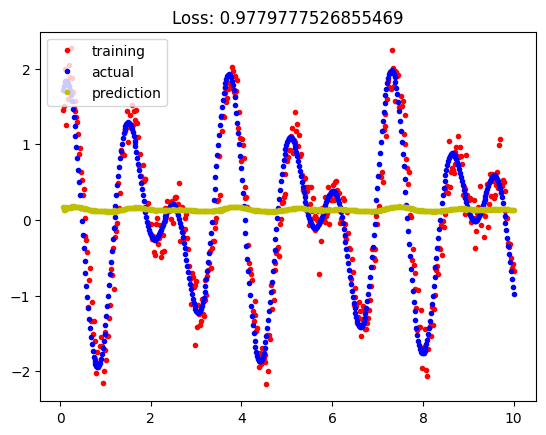

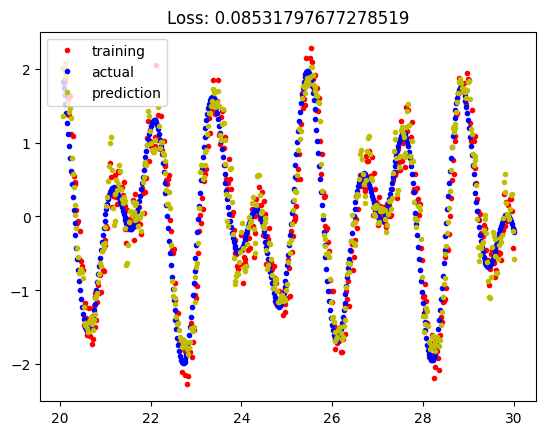

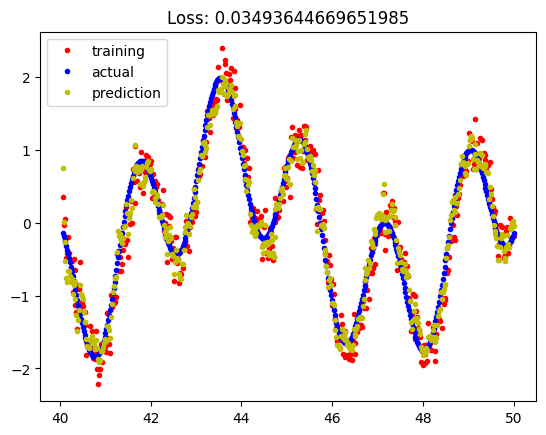

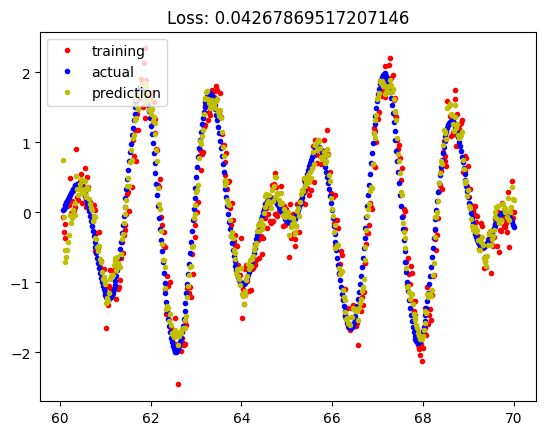

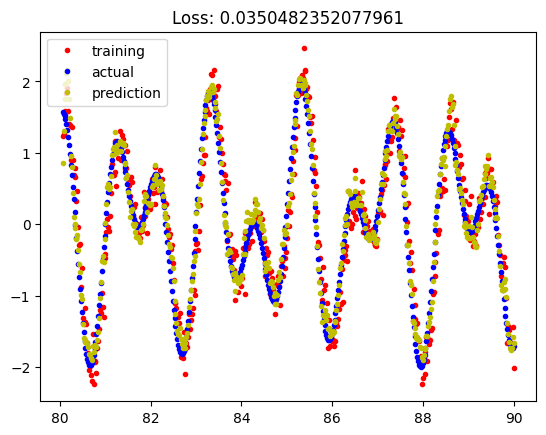

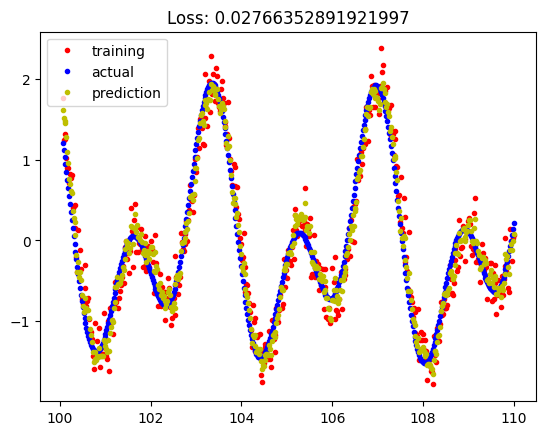

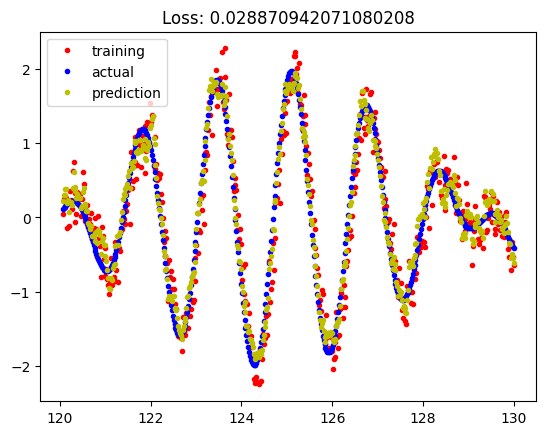

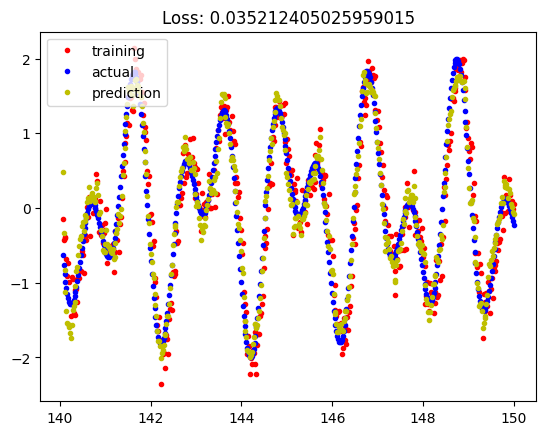

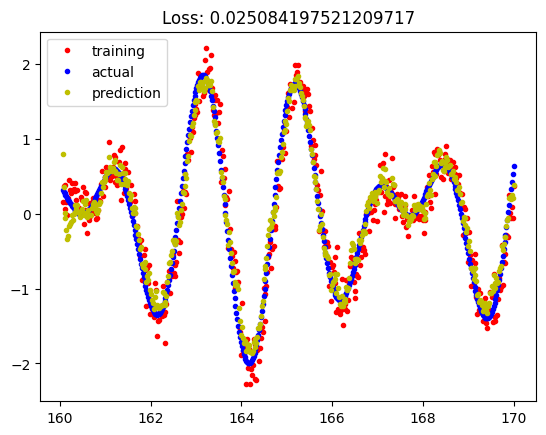

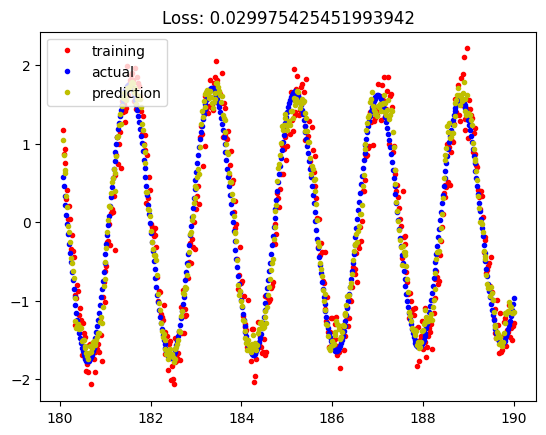

In [ ]:

# train the rnn and monitor results

n_steps = 200
stride = 10
lag = 3
alpha = 0.2
seq_length = 500
print_every = 20

trained_rnn = train(rnn, y_func,  n_steps, print_every,
                    stride,seq_length,alpha,lag)

P3Q3: (10pts)

(a) Do you think our model performs well?     
(b) Write about the relationships and interplay between the different hyper-parameters, and explain how they effect the RNN model. Please relate also to the RNN architecture in our solution.

(c) Can you give a real world example where this type of model can be applied?   
(d) What would you change to improve it?

(a) Yes, the model performs reasonably well, but with some characteristics worth noting:

- Initial Loss Decrease: The loss decreases quickly in the early stages of training, which is a good sign that the model is learning the patterns in the data effectively.

- Steady Loss Plateau: After a certain point, the loss seems to stabilize around 0.03. Looks like the model initially learns quickly and then approaches a point of Plateau, meaning it has learned most of the patterns it can capture with the given architecture and data.

- From looking at the plots it looks like the model predicts the y series well.

(b) Relationships and interplay between different hyper-parameters:

1. n_steps (200):
  
  This defines how many steps the model will train for.

  impact:
    - A higher value would allow the model to train for more iterations, which might help improve learning, especially if the model has not yet converged.
    - In this case, 200 steps may be enough to see the model converge (since the loss plateaus after a certain point). However, if the loss is still decreasing during later steps, increasing n_steps could lead to better results.
    - If training for too many steps, overfitting might occur if the model starts to memorize the noise in the data instead of learning the underlying patterns.

2. seq_length (500):

  The length of the input sequence that the model processes at each time step. If the sequence is too long, the model might struggle to capture long-term dependencies due to the vanishing gradient problem. A longer sequence provides more information, but may be harder for the RNN to learn from.
  
  In this case, the sequence length of 500 should be manageable, but if the model struggles with long sequences, shorter sequences may be more effective.

3. stride (10):

  The stride controls how much the time step changes between each sample in the sequence.

  The stride determines how much the time step changes between each sample. A large stride means that the data will be sampled with more significant steps, while a smaller stride will provide more granular information.

  A stride of 10 seems reasonable for this problem. However, reducing it could lead to better model performance if the task requires more detailed data points.

4. alpha (0.2) (Noise Level):

  This controls the noise level added to the data. A higher value makes the data noisier, and the model has to learn a more complex representation to recover the underlying signal. Too much noise may prevent the model from learning effectively.

  With alpha=0.2, the model will face some level of noise, which is typical for many real-world tasks. Reducing this noise might help the model learn more effectively, while increasing it could make the model more robust to noisy data.

5. lag (3):

  This defines how much the output is shifted relative to the input. A lag of 3 means the model is trying to predict future values based on past data points, which introduces the concept of temporal dependency.

  In this case, a lag of 3 is reasonable for modeling the system, but experimenting with different lags might allow the model to learn more effectively.

**Interplay Between the Hyperparameters**:

- seq_length and stride:

  These two hyperparameters interact significantly. A larger sequence length (seq_length = 500) provides a larger amount of data per sample, but when combined with a larger stride (stride = 10), the model receives fewer but more spaced-out samples from the sequence. If stride were smaller, the model would receive more detailed samples from the sequence and might learn finer temporal dependencies.

- lag and alpha:

  The lag and the noise level (alpha) have a subtle interaction. A larger lag means that the model has to forecast further into the future, which can be more difficult when noise is present. If there were less noise (alpha), the model might be better at predicting further into the future with a larger lag, as it would have more precise data to base its predictions on. With higher noise, the model might struggle with long-term dependencies (higher lag) as the signal is obscured.

- n_steps and seq_length:
  
  More training steps (n_steps = 200) can help the model learn from longer sequences. However, if the sequence is too long, it could lead to issues with vanishing gradients or slow learning. The length of sequences should be balanced with the number of steps to ensure that the model has enough time to learn from all data points but doesn’t overfit or converge prematurely.


(c) This type of model could be applied in several real-world scenarios:

1. Time-series forecasting:
  
  For example, predicting stock prices, temperature changes, or energy consumption based on previous data.
2. Natural Language Processing (NLP):
  
  RNNs can be used for tasks like language translation or text generation, where the sequence of words or characters has temporal dependencies.


(d) What would you change to improve it?

- Hyperparameter tuning:

  Experiment with different values for hyper parameters.

- Data Preprocessing:

  Normalize or standardize the input data to help the RNN learn more effectively.

- Optimizer & Learning Rate:

  Try using different optimizers like RMSProp or SGD and experiment with different learning rates to see if the convergence is improved.

- Long Short-Term Memory (LSTM):

  Replace the RNN with an LSTM or GRU (Gated Recurrent Unit), which are designed to handle long-term dependencies better and avoid issues with vanishing gradients.

- Regularization:

  Consider adding dropout layers to the RNN or fully connected layers to prevent overfitting.

THE END!